TITLE : Linear LTSF model on the Appliances Energy Prediction

This code provides a basic framework for implementing the Linear LTSF model on the Appliances Energy Prediction dataset.

To begin with, the code imports the libraries required for data manipulation, visualization, model training, and assessment, such as NumPy, Pandas, Matplotlib, and scikit-learn modules.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


Using Pandas' read_csv function, it loads the dataset from a URL and saves it in a DataFrame called df.

In [ ]:
# Load the dataset
dataLink = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"
df = pd.read_csv(dataLink)

Displaying the loaded data sets.

In [ ]:
print(df)

                      date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.0

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


It carries out preliminary operations. This component counts the number of missing values for each column in the dataset and checks for them.

In [ ]:
# Preprocessing
# Handling missing values
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


It attests to the dataset's lack of missing values.It claims that since the dataset lacks categorical variables, encoding is not required.The dataset is divided into characteristics (X) and the target variable (y), where the target variable is the energy consumption of appliances and features include various environmental and meteorological data.

In [ ]:
# There are no missing values, so no imputation is needed

# Encoding categorical variables (if any)
# There are no categorical variables in this dataset, so no encoding needed

# Split the data into features and target variable
X = df[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]  # Features
y = df['Appliances']  # Target variable

It normalizes the features using StandardScaler to ensure all features are on the same scale, which is important for linear regression.

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

It splits the normalized features and target variable into training and testing sets with a test size of 20% and a random state for reproducibility.

In [ ]:
# Split the normalized data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

It defines a custom Linear Regression model LinearRegressionModel with methods for fitting the model (fit), making predictions (predict), and getting/setting parameters (get_params, set_params). The model calculates coefficients using the closed-form solution of linear regression.


In [ ]:
# Implement Linear LTSF model
# Linear Least Squares Fitting (LTSF) model is essentially Linear Regression, so we'll define it manually
class LinearRegressionModel:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add bias term
        X_bias = np.c_[np.ones(X.shape[0]), X]

        # Calculate coefficients using closed-form solution
        self.coefficients = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

    def predict(self, X):
        # Add bias term
        X_bias = np.c_[np.ones(X.shape[0]), X]

        # Predict using coefficients
        predictions = X_bias.dot(self.coefficients)
        return predictions

    def get_params(self, deep=True):
        return {}

    def set_params(self, **params):
        pass

It initializes an instance of the custom Linear Regression model.

In [ ]:
# Initialize Linear Regression model
model = LinearRegressionModel()

It fits the custom Linear Regression model to the training data.

In [ ]:
# Fit the model on the training data
model.fit(X_train, y_train)

In [ ]:
print(model)

It makes predictions using the fitted model on the test data.

In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

In [ ]:
print(predictions)

[ 43.1765416  259.03466618  46.91895878 ... 111.1114265   58.34384305
  99.76990265]


It evaluates the model using metrics such as Mean Squared Error, Mean Absolute Error, and R^2 Score, and prints the results.

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)


Mean Squared Error: 8312.271343525228
Mean Absolute Error: 52.54707797216352
R^2 Score: 0.16936187895229804


In [ ]:
# Forecasting
# Generate future time points for forecasting
num_future_points = 25
X_future = np.arange(X_normalized.shape[0], X_normalized.shape[0] + num_future_points).reshape(-1, 1)


In [ ]:
print(X_future.shape)

(25, 1)


In [ ]:
print(scaler.n_features_in_)

25


In [ ]:
total_elements = X_future.size
print(f"Total elements in X_future: {total_elements}")

Total elements in X_future: 25


In [ ]:
# Reshape X_future to match the expected number of features
X_future_reshaped = X_future.reshape(-1, 25)

# Normalize the future time points
X_future_normalized = scaler.transform(X_future_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


we use the existing predict method to generate forecasted values for future time points. We generate future time points using np.arange and normalize them using the same scaler used for training data. Finally, we make forecasts using the predict method and print out the forecasted values.

In [ ]:
# Forecast future values
forecast_values = model.predict(X_future_normalized)

In [ ]:
print("Forecasted Values:", forecast_values)

Forecasted Values: [52039.02772855]


The forecasted values are plotted along with the actual and predicted values using Matplotlib.
The forecasted values are plotted starting from the end of the actual data, extending for the specified number of future points.

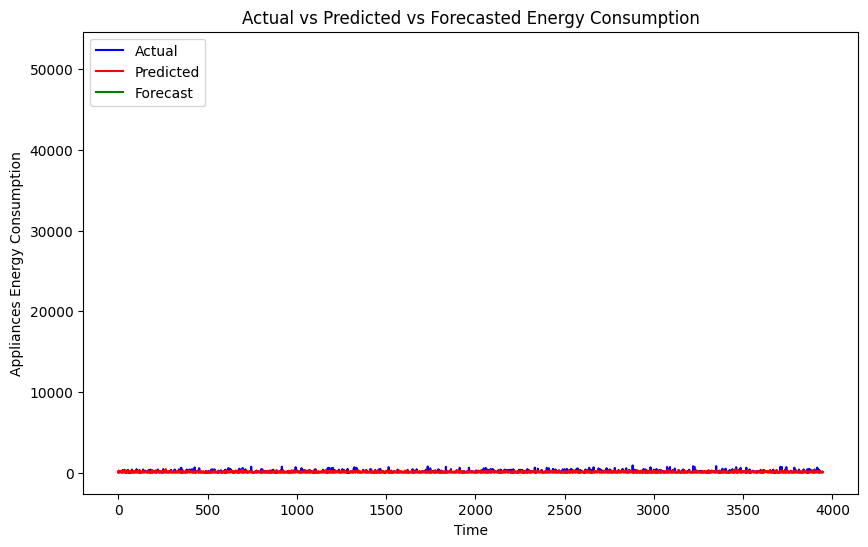

In [ ]:
# Visualize the predictions and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.plot(np.arange(len(y_test), len(y_test) + len(forecast_values)), forecast_values, label='Forecast', color='green')
plt.xlabel('Time')
plt.ylabel('Appliances Energy Consumption')
plt.title('Actual vs Predicted vs Forecasted Energy Consumption')
plt.legend()
plt.show()

It visualizes the actual versus predicted energy consumption using a scatter plot.

<ipython-input-24-7b040fbb98ea>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


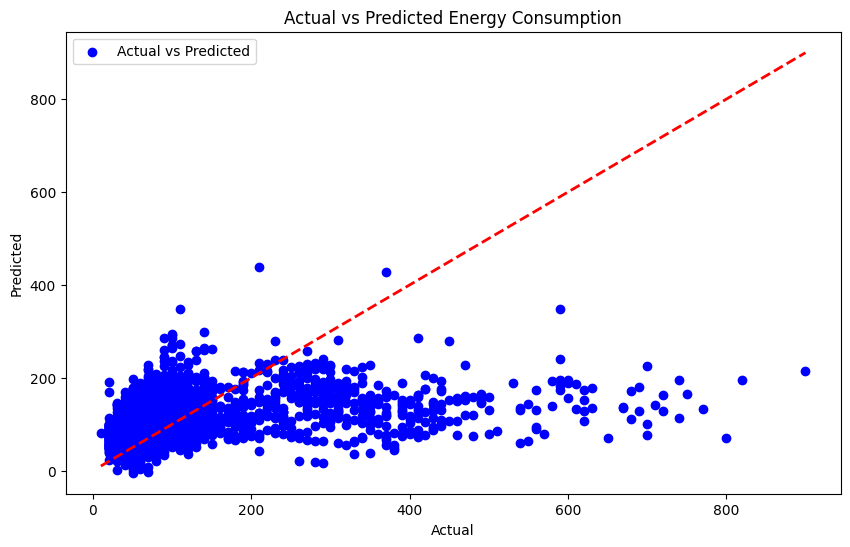

In [ ]:
# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()
plt.show()

It visualizes the importance of each feature in predicting energy consumption using a horizontal bar plot.

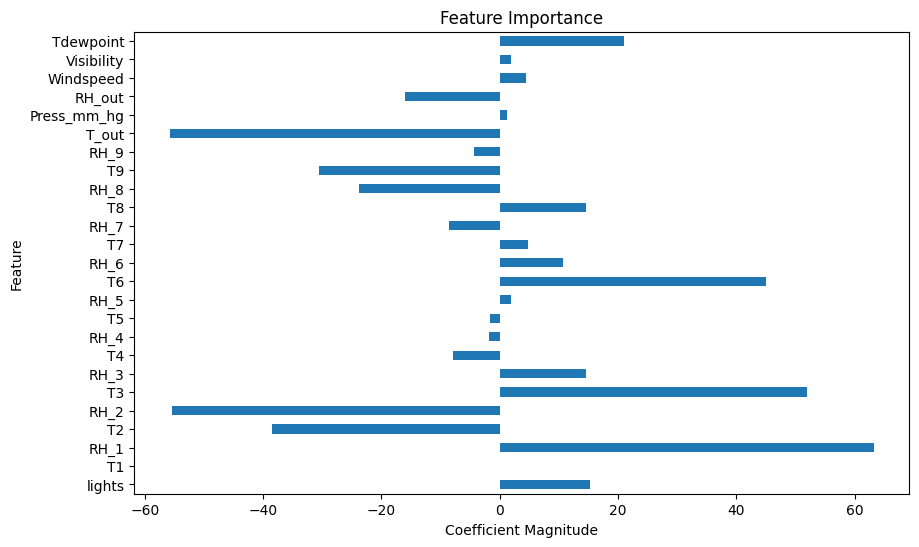

In [ ]:
# Visualize feature importance
# Since we're not using coefficients attribute from scikit-learn Linear Regression,
# we need to calculate the coefficients manually for feature importance visualization.
# We can use model.coefficients attribute from our custom Linear Regression class.

# Calculate feature importance
feature_importance = pd.Series(model.coefficients[1:], index=X.columns)  # Exclude bias term
feature_importance.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


It visualizes the actual versus predicted energy consumption on the training data to assess model performance.

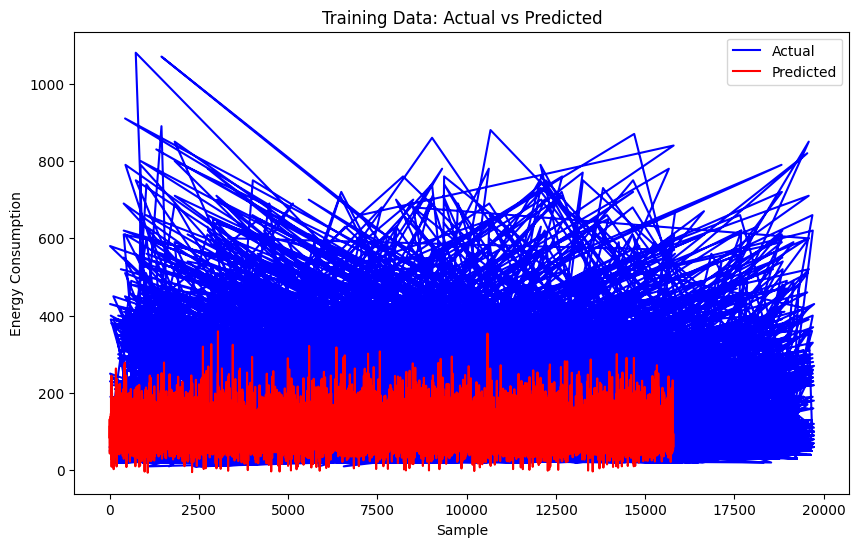

In [ ]:
# Visualize the training data
plt.figure(figsize=(10, 6))
plt.plot(y_train, color='blue', label='Actual')
plt.plot(model.predict(X_train), color='red', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Energy Consumption')
plt.title('Training Data: Actual vs Predicted')
plt.legend()

In [ ]:
print(type(model))

<class '__main__.LinearRegressionModel'>


Gives the results in form of cross function mean square error

In [ ]:
# Hyperparameter tuning
# Cross-validate to find the optimal hyperparameters
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated Mean Squared Error:", -scores.mean())


Cross-validated Mean Squared Error: 8936.069923102754
